# Plot timings from CESM/NorESM runs on Betzy and/or Fram

In [205]:
import glob

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
font = {
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

## Get number of processors

In [185]:
def get_nprocs(buffer):
    answer = buffer.find('pe count for cost estimate')
    nb_processors = int(buffer[answer:].split("\n")[0].split(":")[1])
    return nb_processors

## Get Model Cost

In [186]:
def get_modelcost(buffer):
    answer = buffer.find('Model Cost')
    model_cost = float((buffer[answer:].split("\n")[0].split(":")[1]).split('pe-hrs/simulated_year')[0])
    return model_cost    

## Get Model throughput

In [187]:
def get_modelthroughput(buffer):
    answer = buffer.find('Model Throughput')
    model_throughput = float((buffer[answer:].split("\n")[0].split(":")[1]).split('simulated_years/day')[0])
    return model_throughput    

## Init time

In [188]:
def get_initime(buffer):
    answer = buffer.find('Init Time')
    model_init_time = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_init_time   

## Run Time

In [189]:
def get_runtime(buffer):
    answer = buffer.find('Run Time')
    model_runtime = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_runtime   

## Final Time

In [190]:
def get_finaltime(buffer):
    answer = buffer.find('Final Time')
    model_finaltime = float((buffer[answer:].split("\n")[0].split(":")[1]).split('seconds')[0])
    return model_finaltime   

## Extract timing information for one case


In [191]:
def get_timing(platform_case, esm_case, filename, dframe):
    print(filename)
    f = open(filename, "r")
    buffer = f.read()
    data = {'platform': platform_case,
            'case': esm_case,
            'pe-count':  get_nprocs(buffer),
            'cost': get_modelcost(buffer),
            'throughput': get_modelthroughput(buffer),
            'initime': get_initime(buffer),
            'runtime': get_runtime(buffer),
            'finaltime': get_finaltime(buffer),
        }
    return dframe.append(data, ignore_index=True)

In [192]:
def get_timings_from_files(platform_case, esm_case, df):
    files_to_list = "timings/cesm_timing." + platform_case + "-*-" + esm_case + "*"
    files = glob.glob(files_to_list)
    for file in files:
        df = get_timing(platform_case, esm_case, file, df)
    return df

## Create pandas dataframe to be filled with timings

In [193]:
columns = ['platform', 'case', 'pe-count', 'cost', 'throughput', 'initime', 'runtime', 'finaltime']
df = pd.DataFrame (columns = columns)

## Go through files to get timings

#### GNU NORESM bare metal

In [194]:
platform_case = "betzy_gnu-noresm"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, df)

timings/cesm_timing.betzy_gnu-noresm-6x128p-NF2000climo-f19_f19_mg17.171238.210406-190449
timings/cesm_timing.betzy_gnu-noresm-2x128p-NF2000climo-f19_f19_mg17.169971.210406-003815
timings/cesm_timing.betzy_gnu-noresm-1x128p-NF2000climo-f19_f19_mg17.169973.210406-005316
timings/cesm_timing.betzy_gnu-noresm-4x128p-NF2000climo-f19_f19_mg17.169972.210405-231832
timings/cesm_timing.betzy_gnu-noresm-5x128p-NF2000climo-f19_f19_mg17.171240.210406-190459
timings/cesm_timing.betzy_gnu-noresm-3x128p-NF2000climo-f19_f19_mg17.171232.210406-190220
timings/cesm_timing.betzy_gnu-noresm-8x128p-NF2000climo-f19_f19_mg17.171220.210406-185611
timings/cesm_timing.betzy_gnu-noresm-7x128p-NF2000climo-f19_f19_mg17.171233.210406-190306


#### Intel NorEMS bare metal

In [195]:
platform_case = "betzy-noresm"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, df)

timings/cesm_timing.betzy-noresm-6x128p-NF2000climo-f19_f19_mg17.171206.210406-184732
timings/cesm_timing.betzy-noresm-7x128p-NF2000climo-f19_f19_mg17.171185.210406-183834
timings/cesm_timing.betzy-noresm-8x128p-NF2000climo-f19_f19_mg17.171244.210406-190555
timings/cesm_timing.betzy-noresm-6x128p-NF2000climo-f19_f19_mg17.171245.210406-190610
timings/cesm_timing.betzy-noresm-3x128p-NF2000climo-f19_f19_mg17.171201.210406-184614
timings/cesm_timing.betzy-noresm-5x128p-NF2000climo-f19_f19_mg17.171191.210406-184048
timings/cesm_timing.betzy-noresm-2x128p-NF2000climo-f19_f19_mg17.169970.210406-002640
timings/cesm_timing.betzy-noresm-1x128p-NF2000climo-f19_f19_mg17.169968.210406-000644
timings/cesm_timing.betzy-noresm-4x128p-NF2000climo-f19_f19_mg17.169969.210405-231254
timings/cesm_timing.betzy-noresm-8x128p-NF2000climo-f19_f19_mg17.171202.210406-184700


#### GNU NorESM container with MPICH

In [196]:
platform_case = "noresm-gnu-ucx-mpich-container"
esm_case = "NF2000climo-f19_f19_mg17"
df = get_timings_from_files(platform_case, esm_case, df)

timings/cesm_timing.noresm-gnu-ucx-mpich-container-1x128p-NF2000climo-f19_f19_mg17.210406.175802
timings/cesm_timing.noresm-gnu-ucx-mpich-container-6x128p-NF2000climo-f19_f19_mg17.210406.183834
timings/cesm_timing.noresm-gnu-ucx-mpich-container-3x128p-NF2000climo-f19_f19_mg17.210406.181044
timings/cesm_timing.noresm-gnu-ucx-mpich-container-4x128p-NF2000climo-f19_f19_mg17.210406.173534
timings/cesm_timing.noresm-gnu-ucx-mpich-container-7x128p-NF2000climo-f19_f19_mg17.210406.181236
timings/cesm_timing.noresm-gnu-ucx-mpich-container-5x128p-NF2000climo-f19_f19_mg17.210406.174221
timings/cesm_timing.noresm-gnu-ucx-mpich-container-8x128p-NF2000climo-f19_f19_mg17.210406.180521
timings/cesm_timing.noresm-gnu-ucx-mpich-container-2x128p-NF2000climo-f19_f19_mg17.210406.182641


In [197]:
df.to_csv('timings_betzy.csv', index=False)

## Plot timings

In [198]:
df.set_index('pe-count', inplace=True)

In [213]:
def make_plot(df, colname, title, ylabel):
    fig = plt.figure(1, figsize=[10,10])
    df.sort_index().groupby('platform')[colname].plot(style='.-')
    plt.xlabel("Number of CPUs")
    plt.ylabel(ylabel)
    plt.title(title + "\n")
    plt.legend(["Bare metal (Intel OpenMPI)", "Bare metal (GNU OpenMPI)", "Singularity (GNU MPICH/UCX)"])
    plt.savefig(colname + ".png")

### Plot Model cost

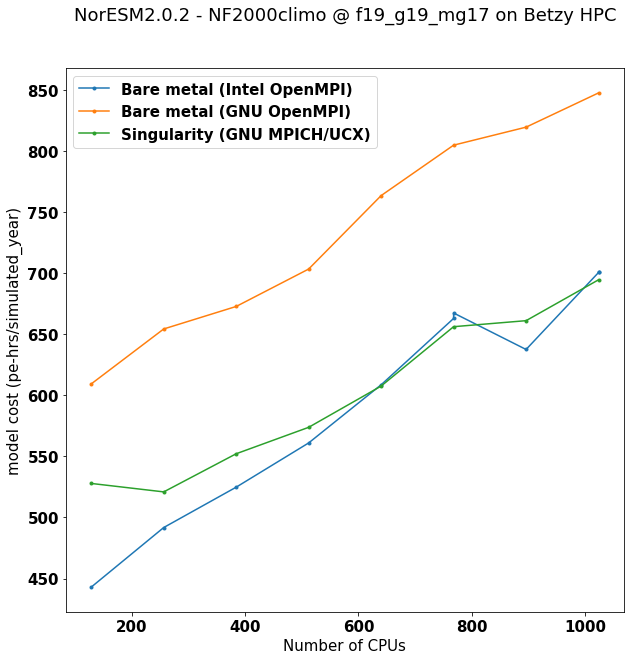

In [214]:
make_plot(df, 'cost', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC\n", "model cost (pe-hrs/simulated_year)")

### Model Throughput

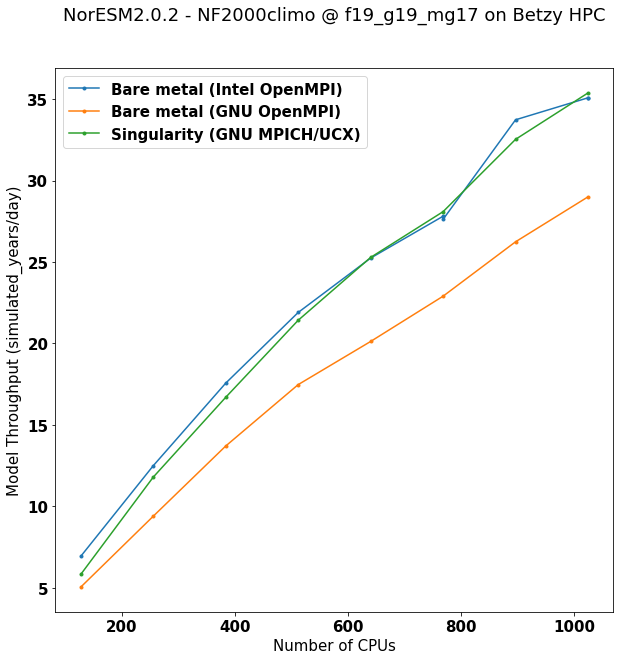

In [215]:
make_plot(df, 'throughput', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC\n", "Model Throughput (simulated_years/day)")

### Model Init Time

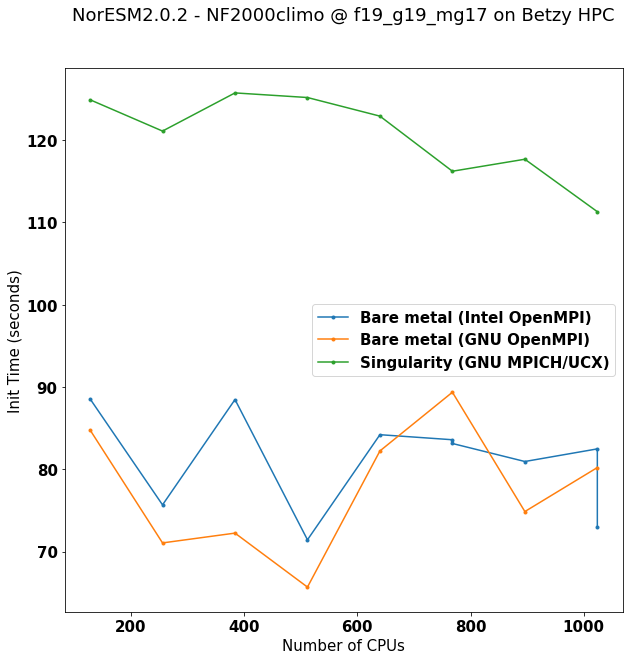

In [216]:
make_plot(df, 'initime', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC\n", "Init Time (seconds)")

### Model Run Time

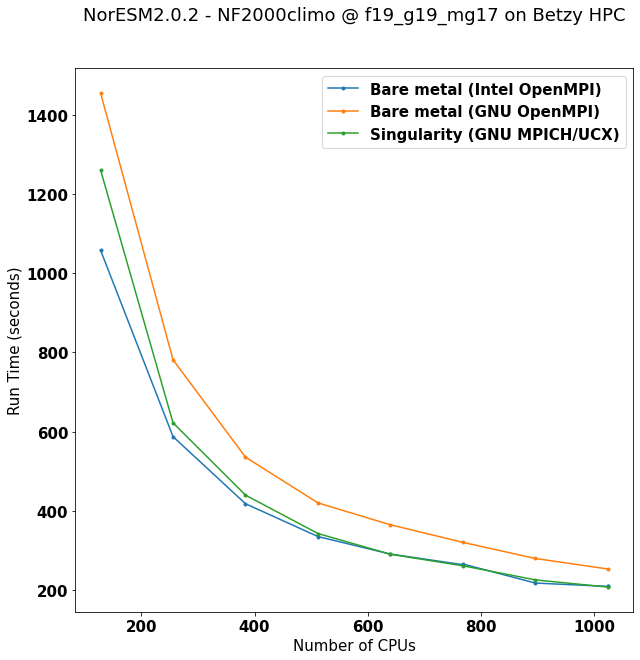

In [217]:
make_plot(df, 'runtime', "NorESM2.0.2 - NF2000climo @ f19_g19_mg17 on Betzy HPC\n", "Run Time (seconds)")

In [218]:
df

,platform,case,cost,throughput,initime,runtime,finaltime
pe-count,,,,,,,
768,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,804.74,22.90,89.365,320.380,0.042
256,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,654.31,9.39,71.047,781.472,0.274
128,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,609.34,5.04,84.778,1455.521,0.121
512,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,703.35,17.47,65.676,420.020,0.390
640,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,763.46,20.12,82.228,364.735,0.122
384,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,672.73,13.70,72.238,535.650,0.077
1024,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,847.51,29.00,80.209,253.057,0.082
896,betzy_gnu-noresm,NF2000climo-f19_f19_mg17,819.48,26.24,74.860,279.640,0.081
768,betzy-noresm,NF2000climo-f19_f19_mg17,662.90,27.81,83.589,263.910,0.057
